# Task 2

Use bisection search to optimize the problem:

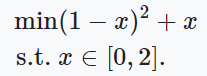

Code the search algorithm by yourself, not use the one shown in the lecture material.

In [ ]:
def function_one(x):
  return (1-x)**2 + x

My implementation of bisection method

In [ ]:
# as input are:
# starding and ending point of interval - a, b
# stopping criteria - if change of function values between iterations is lower as some threshold - stop
# epsilon value for checking neighbourhood value of function - epsilon
# and of course function where we want to find local minimum - function
def bisection_method(a, b, stop, epsilon, function):
  # checks of inputs
  if (stop <= 0 or epsilon <= 0):
    return -1
  # implementation
  optimum = 0
  fa,fb,oldfa,oldfb = 1000000, 1000000, 10000, 10000
  iterations = 0
  while((abs(oldfa-fa)) > stop or abs(oldfb-fb) > stop):
    middle_point = (a + b) / 2
    lower_point = middle_point - epsilon
    upper_point = middle_point + epsilon
    oldfa = fa
    oldfb = fb
    fa = function(lower_point)
    fb = function(upper_point)

    if (fa < fb):
      b = middle_point
    else:
      a = middle_point
    iterations += 1
  optimum = (a + b) / 2
  return optimum, iterations

Just for comparison of my implementation and implementation from lecutre, i paste this implementation, but i also implemented here counter of iterations.

In [ ]:
def bisection_line_search(a,b,f,L,epsilon):
    x = a
    y = b
    iterations = 0
    while y-x > 2*L:
        m = (x+y)/2
        if f(m+epsilon) > f(m-epsilon):
            y = m + epsilon
        else:
            x = m - epsilon
        iterations +=1
    return (x+y)/2, iterations

Results:

In [ ]:
res_my = bisection_method(0,2,0.001,1e-5,function_one)

if (res_my == -1):
  print("Incorrect input!")
else:
  optimum_my = res_my[0]
  iterations_my = res_my[1]

  res_lecture = bisection_line_search(0,2,function_one,0.001,1e-5)
  optimum_lecture = res_lecture[0]
  iterations_lecture = res_lecture[1]

  print(f"My optimal point of function f(x) = (1-x)^2 - x in interval: [0,2] is {optimum_my} and number of iterations: {iterations_my}.")
  print(f"Lecture optimal point of function f(x) = (1-x)^2 - x in interval: [0,2] is {optimum_lecture} and number of iterations: {iterations_lecture}.")

My optimal point of function f(x) = (1-x)^2 - x in interval: [0,2] is 0.5078125 and number of iterations: 7.
Lecture optimal point of function f(x) = (1-x)^2 - x in interval: [0,2] is 0.499028447265625 and number of iterations: 10.


# Task 3

Use the golden section search to optimize the problem from the above exercise. Code the search algorithm by yourself, not use the one shown in the lecture material.

### Golden section

Let $a<c<b$ be such that $\frac{b-a}{c-a}=\frac{c-a}{b-c}$. Then it is said that the point $c$ devides interval $[a,b]$ in the ratio of golden section (from the left, mirror from the right). Note that $c=a+\frac{\sqrt{5}-1}2(b-a)\approx a+0.618(b-a)$.

There is a theorem that if $a<c<d<b$ and both points $c$ and $d$ divide the interval $[a,b]$ in the ratio of golden section (from right and left), then the point $c$ divides the interval $[a,d]$ in the ratio of golden section from the left.


In [ ]:
import math
# function for calculate point in the ration of golden section from two points
def golden_ratio(a,b):
  prem = (math.sqrt(5) - 1) / 2
  return a + prem * (b - a)

My implementation of golden section method

In [ ]:
# as input shoud be:
# starding and ending point of interval - a, b
# some stopping criteria - a and b are closer that some threshold - stop
# and of course function where we want to find local minimum - function
def golden_section_method(a, b, stop, function):
  # check input
  if (stop <= 0):
    return -1

  fc,fd,oldfc,oldfd = 1000000,1000000,10000,10000
  iterations = 0

  while((abs(oldfc-fc)) > stop or abs(oldfd-fd) > stop):
    c = golden_ratio(b,a)
    d = golden_ratio(a,b)
    oldfc = fc
    oldfd = fd
    fc = function(c)
    fd = function(d)
    if (fc < fd):
      b = d
    else:
      a = c
    iterations += 1
  return (c + d) / 2, iterations

Also for comparison of my implementation and implementation from lecutre, i paste this implementation, and i also implemented here counter of iterations.


In [ ]:
import math
def golden_section_line_search(a,b,f,L):
    x = a
    y = b
    iterations = 0
    while y-x>2*L:
        gr = (math.sqrt(5)-1)/2
        d = x + gr*(y-x)
        c = y - gr*(y-x)
        if f(d)>f(c):
            y = d
        else:
            x = c
        iterations += 1
    return (x+y)/2, iterations

Results:

In [ ]:
res_my = golden_section_method(0,2,0.0001,function_one)
if res_my == -1:
  print("Invali input!")
else:
  optimum_my = res_my[0]
  iterations_my = res_my[1]

  res_lecture = golden_section_line_search(0,2,function_one,0.0001)
  optimum_lecture = res_lecture[0]
  iterations_lecture = res_lecture[1]

  print(f"My optimal point of function f(x) = (1-x)^2 - x in interval: [0,2] is {optimum_my} and number of iterations: {iterations_my}.")
  print(f"Lecture optimal point of function f(x) = (1-x)^2 - x in interval: [0,2] is {optimum_lecture} and number of iterations: {iterations_lecture}.")

My optimal point of function f(x) = (1-x)^2 - x in interval: [0,2] is 0.49652781126692946 and number of iterations: 11.
Lecture optimal point of function f(x) = (1-x)^2 - x in interval: [0,2] is 0.4999795718254958 and number of iterations: 20.


# Conclusion:
Bisection method
- with the same input parameters in both implementations, mine - with different stopping criteria - was evaluate with little less iterations and more precision:
- My optimal point: 0.5078125 number of iterations: 7.
- Lecture optimal point: 0.499028447265625 and number of iterations: 10.

Golden section method
- with the same input parameters in both implementations, mine has just a little worst precision but twice less iterations:
- My optimal point: 0.49652781126692946 and number of iterations: 11.
- Lecture optimal point: 0.4999795718254958 and number of iterations: 20.
